In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df["sex"].replace({"female": 1, "male": 0}, inplace=True)  # female=1.  male=0
df["smoker"].replace({"yes": 1,"no": 0}, inplace=True)
df["region"].replace({"southwest": 1,"southeast": 2, "northwest": 3, "northeast":4}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [4]:
df = np.array(df)

In [5]:
df = df.astype(int)
df = df.T
df

array([[   19,    18,    28, ...,    18,    21,    61],
       [    1,     0,     0, ...,     1,     1,     1],
       [   27,    33,    33, ...,    36,    25,    29],
       ...,
       [    1,     0,     0, ...,     0,     0,     1],
       [    1,     2,     2, ...,     2,     1,     3],
       [16884,  1725,  4449, ...,  1629,  2007, 29141]])

In [6]:
df = np.delete(df, 6, 0)
df

array([[19, 18, 28, ..., 18, 21, 61],
       [ 1,  0,  0, ...,  1,  1,  1],
       [27, 33, 33, ..., 36, 25, 29],
       [ 0,  1,  3, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  1],
       [ 1,  2,  2, ...,  2,  1,  3]])

In [7]:
df = df.T

In [8]:
df

array([[19,  1, 27,  0,  1,  1],
       [18,  0, 33,  1,  0,  2],
       [28,  0, 33,  3,  0,  2],
       ...,
       [18,  1, 36,  0,  0,  2],
       [21,  1, 25,  0,  0,  1],
       [61,  1, 29,  0,  1,  3]])

In [9]:
df.shape

(1338, 6)

In [27]:
Y = pd.read_csv('insurance.csv')

In [28]:
Y = np.array(Y)
Y.shape

(1338, 7)

In [29]:
Y = Y.T
Y

array([[19, 18, 28, ..., 18, 21, 61],
       ['female', 'male', 'male', ..., 'female', 'female', 'female'],
       [27.9, 33.77, 33.0, ..., 36.85, 25.8, 29.07],
       ...,
       ['yes', 'no', 'no', ..., 'no', 'no', 'yes'],
       ['southwest', 'southeast', 'southeast', ..., 'southeast',
        'southwest', 'northwest'],
       [16884.924, 1725.5523, 4449.462, ..., 1629.8335, 2007.945,
        29141.3603]], dtype=object)

In [35]:
Y = np.delete(Y, 0, 0)
Y

array([[16884.924, 1725.5523, 4449.462, ..., 1629.8335, 2007.945,
        29141.3603]], dtype=object)

In [36]:
Y = Y.T
Y.shape

(1338, 1)

In [37]:
Y.shape

(1338, 1)

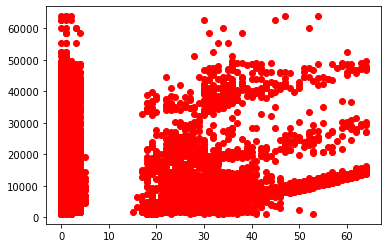

In [38]:
# color and marker
plt.plot(df,Y,"ro")
# show in plot
plt.show()

In [39]:
# init model
model = LinearRegression()

# train model
model.fit(df, Y)

LinearRegression()

In [40]:
# weight
model.coef_

array([[  257.41107232,   132.23640979,   331.28141016,   482.15433768,
        23831.0167079 ,   357.74117002]])

In [41]:
# bias
model.intercept_

array([-13178.82359582])

In [42]:
# linear regression
a = model.coef_*df+model.intercept_
a

array([[ -8288.01322171, -13046.58718603,  -4234.22552147,
        -13178.82359582,  10652.19311208, -12821.0824258 ],
       [ -8545.42429403, -13178.82359582,  -2246.53706051,
        -12696.66925814, -13178.82359582, -12463.34125579],
       [ -5971.31357081, -13178.82359582,  -2246.53706051,
        -11732.36058279, -13178.82359582, -12463.34125579],
       ...,
       [ -8545.42429403, -13046.58718603,  -1252.69283002,
        -13178.82359582, -13178.82359582, -12463.34125579],
       [ -7773.19107706, -13046.58718603,  -4896.78834179,
        -13178.82359582, -13178.82359582, -12821.0824258 ],
       [  2523.2518158 , -13046.58718603,  -3571.66270115,
        -13178.82359582,  10652.19311208, -12105.60008577]])

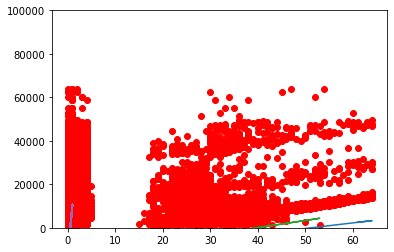

In [43]:
plt.plot(df,Y, 'ro', df, a)

axes = plt.gca()
axes.set_ylim([0,100000])
plt.show()

In [44]:
model.score(df, Y)

0.7507045849862366

In [45]:
model.predict([[19, 1, 28, 0, 1 ,1]])

array([[25308.8605505]])